In [1]:
from pathlib import Path

import scanpy as sc
import pandas as pd
import numpy as np
import partipy as pt
from partipy.datasets import load_hepatocyte_data_2
import decoupler as dc
import plotnine as pn

In [2]:
adata = load_hepatocyte_data_2()
adata

AnnData object with n_obs × n_vars = 1999 × 8354
    obs: 'cell_type', 'zone', 'run_id', 'time_point', 'UMAP_X', 'UMAP_Y'

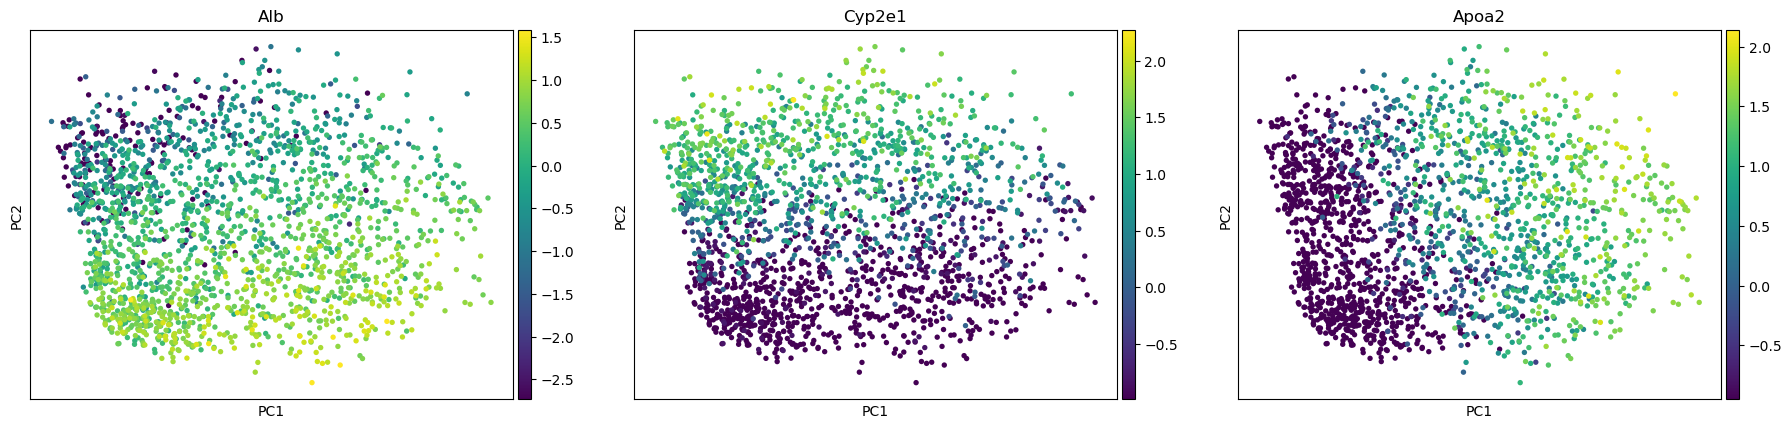

In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
adata.layers["z_scaled"]= sc.pp.scale(adata.X, max_value=10)
sc.pl.pca_scatter(adata, color=["Alb", "Cyp2e1", "Apoa2"])

100%|██████████| 50/50 [01:29<00:00,  1.79s/it]


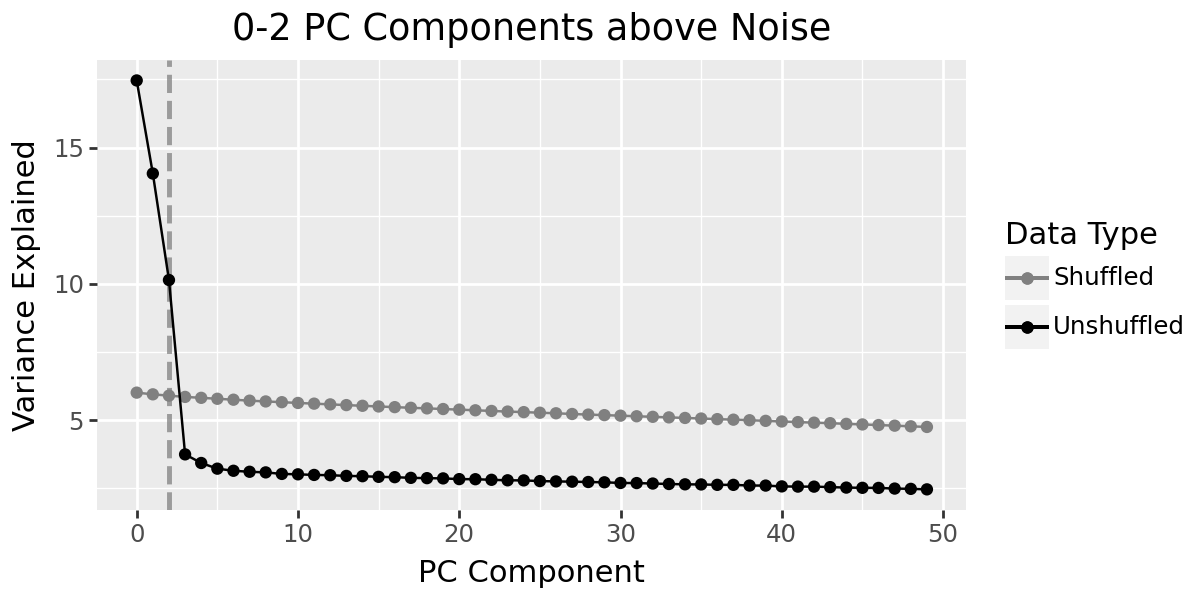

In [4]:
pt.compute_shuffled_pca(adata, mask_var="highly_variable")
pt.plot_shuffled_pca(adata)

In [5]:
pt.set_obsm(adata=adata, obsm_key="X_pca", n_dimensions=3)
adata.uns["AA_config"]

{'obsm_key': 'X_pca', 'n_dimensions': [0, 1, 2]}

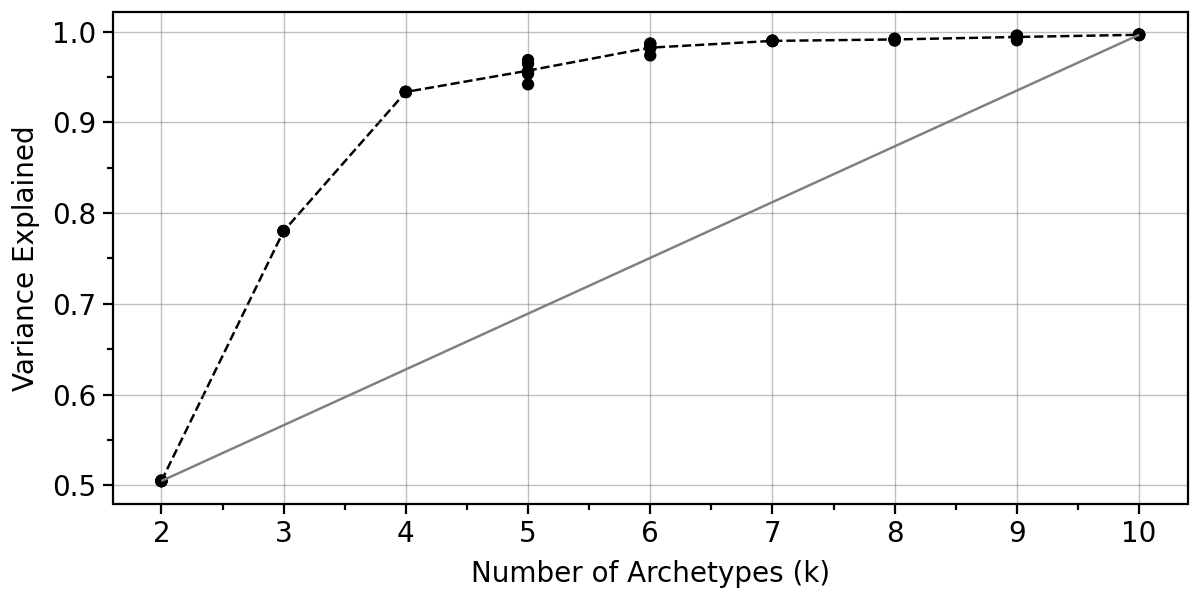

In [6]:
pt.compute_selection_metrics(adata=adata, min_k=2, max_k=10)
pt.plot_var_explained(adata)

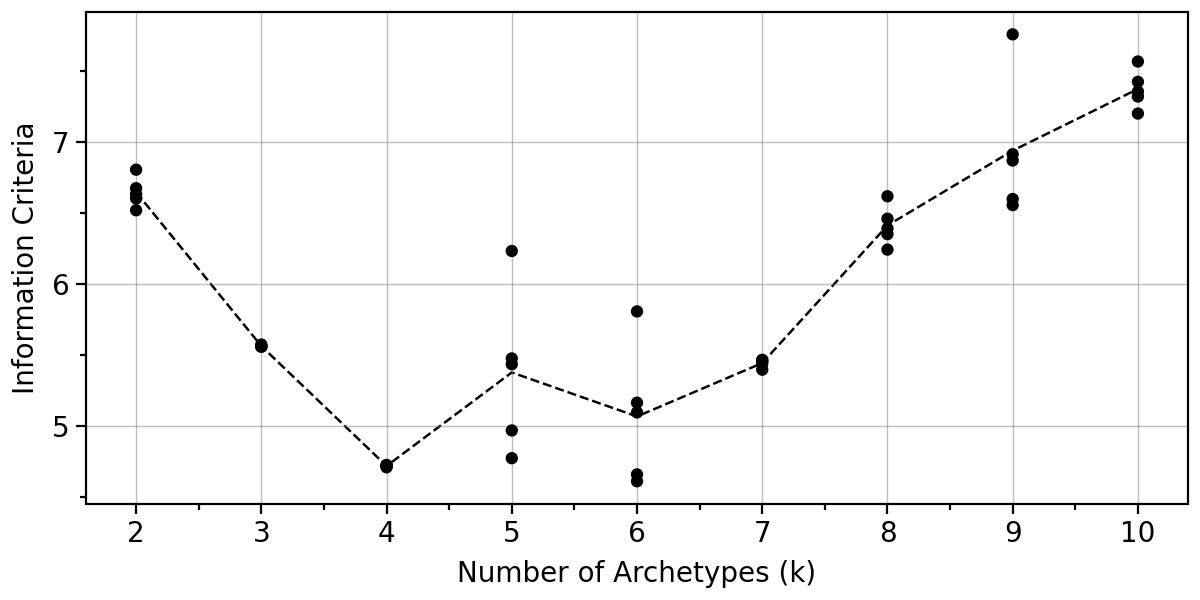

In [7]:
pt.plot_IC(adata)

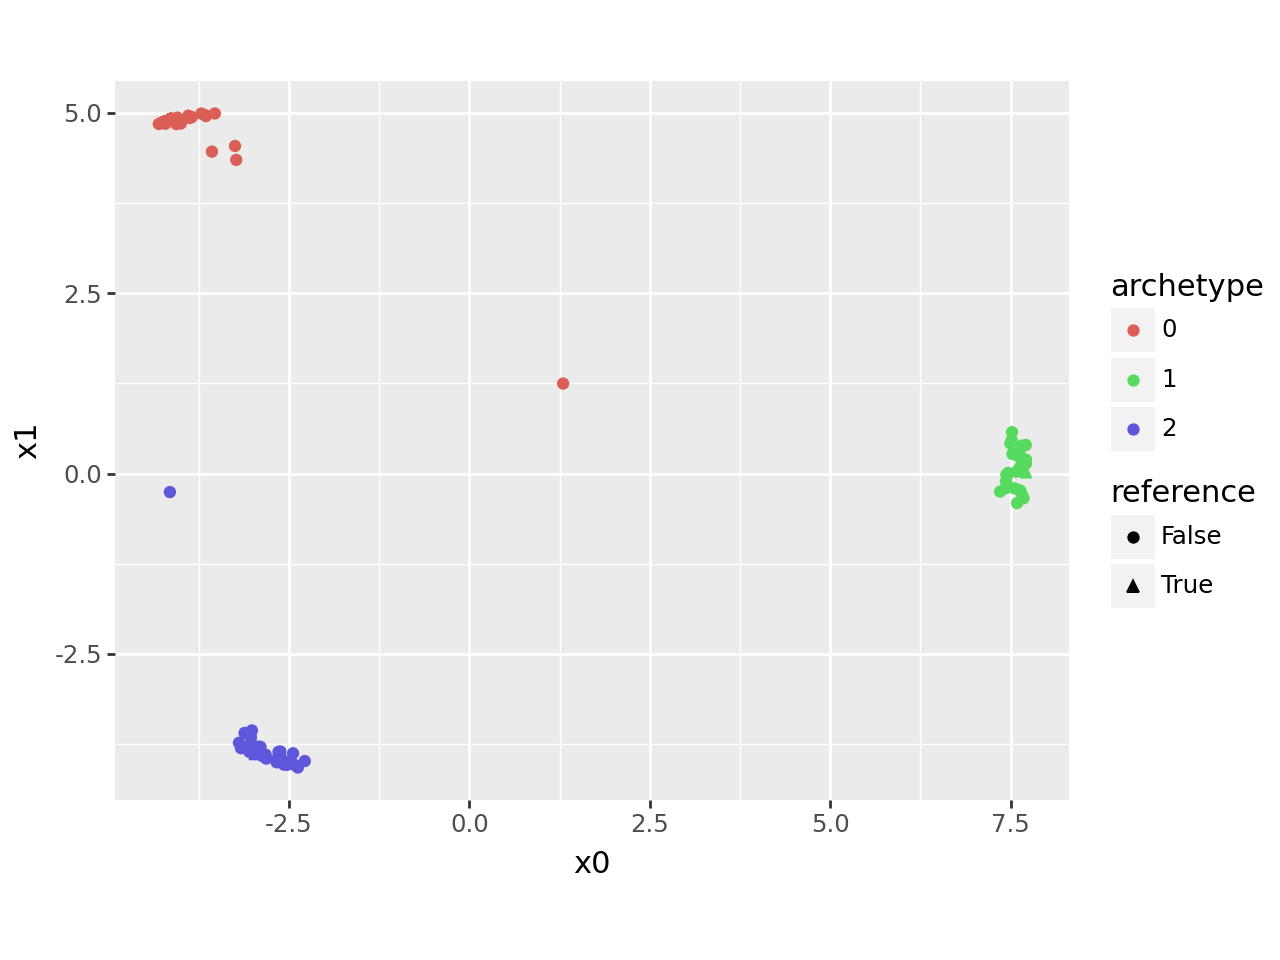

In [8]:
pt.compute_bootstrap_variance(adata=adata, n_bootstrap=30, n_archetypes_list=range(2, 8))
#pt.plot_bootstrap_3D(adata)
pt.plot_bootstrap_2D(adata, n_archetypes=3)

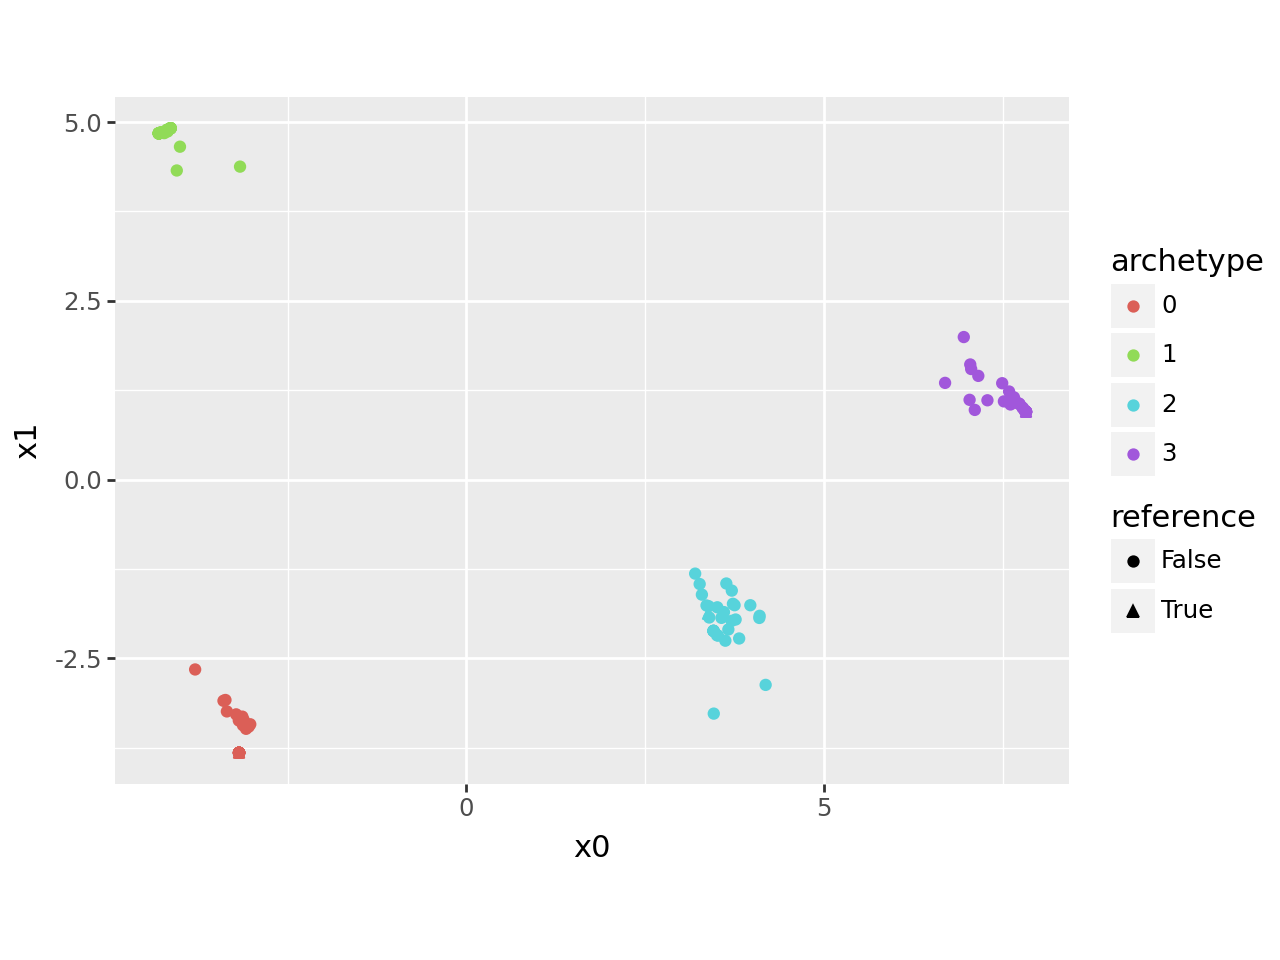

In [9]:
pt.plot_bootstrap_2D(adata, n_archetypes=4)

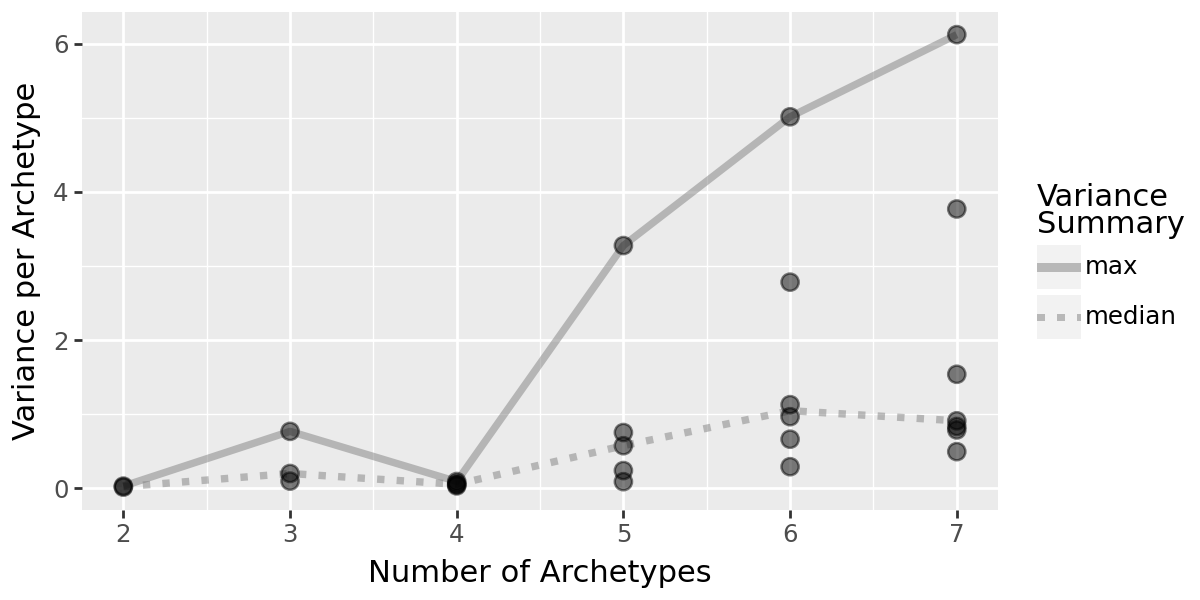

In [10]:
pt.plot_bootstrap_variance(adata) + pn.theme(figure_size=(6, 3))

iter: 29 | RSS: 397.422 | rel_delta_RSS: -0.000057
Algorithm converged after 29 iterations.
iter: 36 | RSS: 397.484 | rel_delta_RSS: -0.000032
Algorithm converged after 36 iterations.
iter: 41 | RSS: 398.883 | rel_delta_RSS: -0.000076
Algorithm converged after 41 iterations.
iter: 33 | RSS: 398.227 | rel_delta_RSS: -0.000055
Algorithm converged after 33 iterations.
iter: 50 | RSS: 398.696 | rel_delta_RSS: -0.000031
Algorithm converged after 50 iterations.


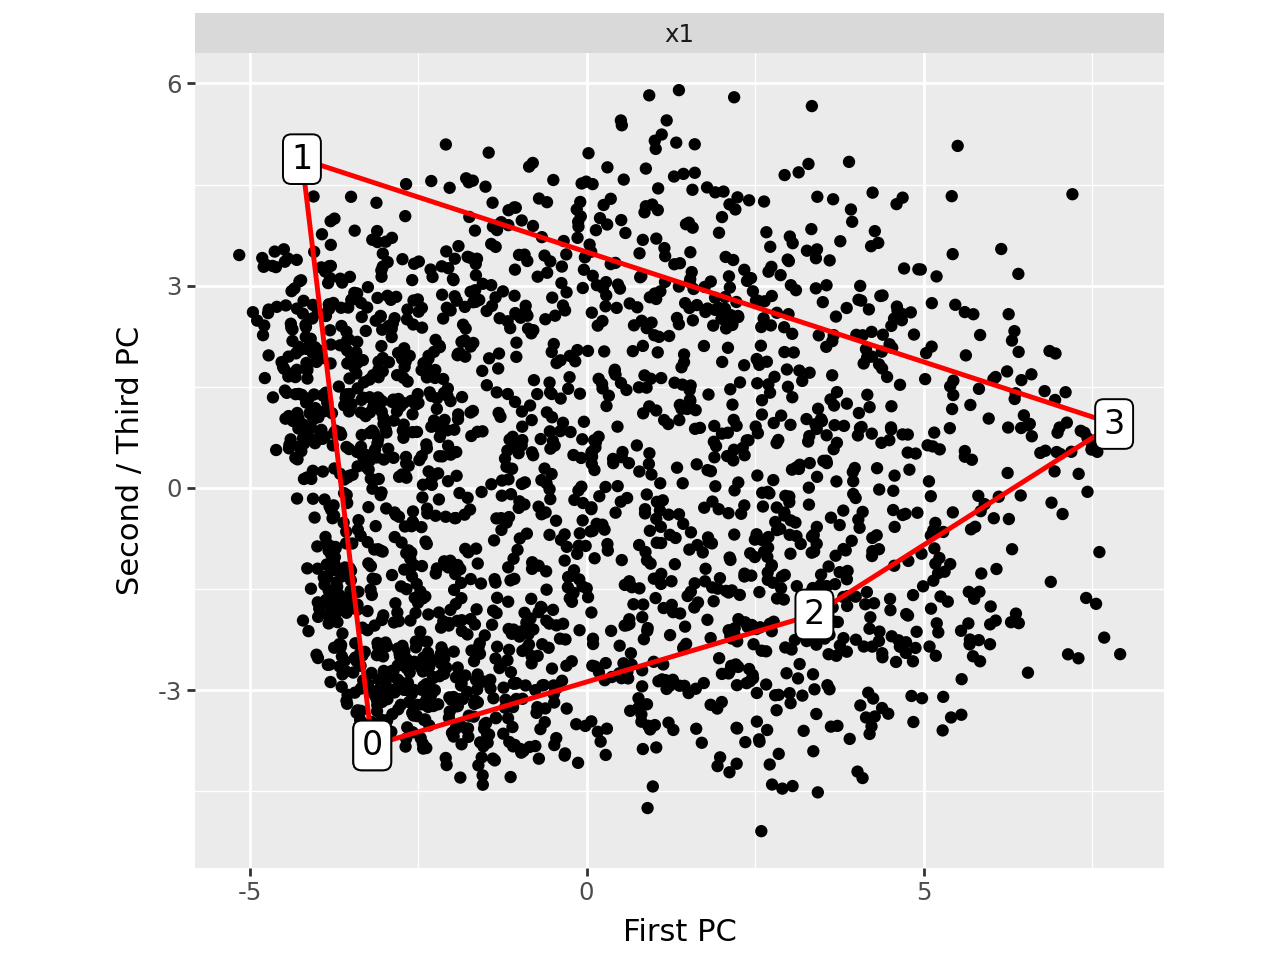

In [11]:
pt.compute_archetypes(adata, n_archetypes=4, verbose=True, archetypes_only=False)

pt.plot_archetypes_2D(adata=adata)

Applied length scale is 3.25.


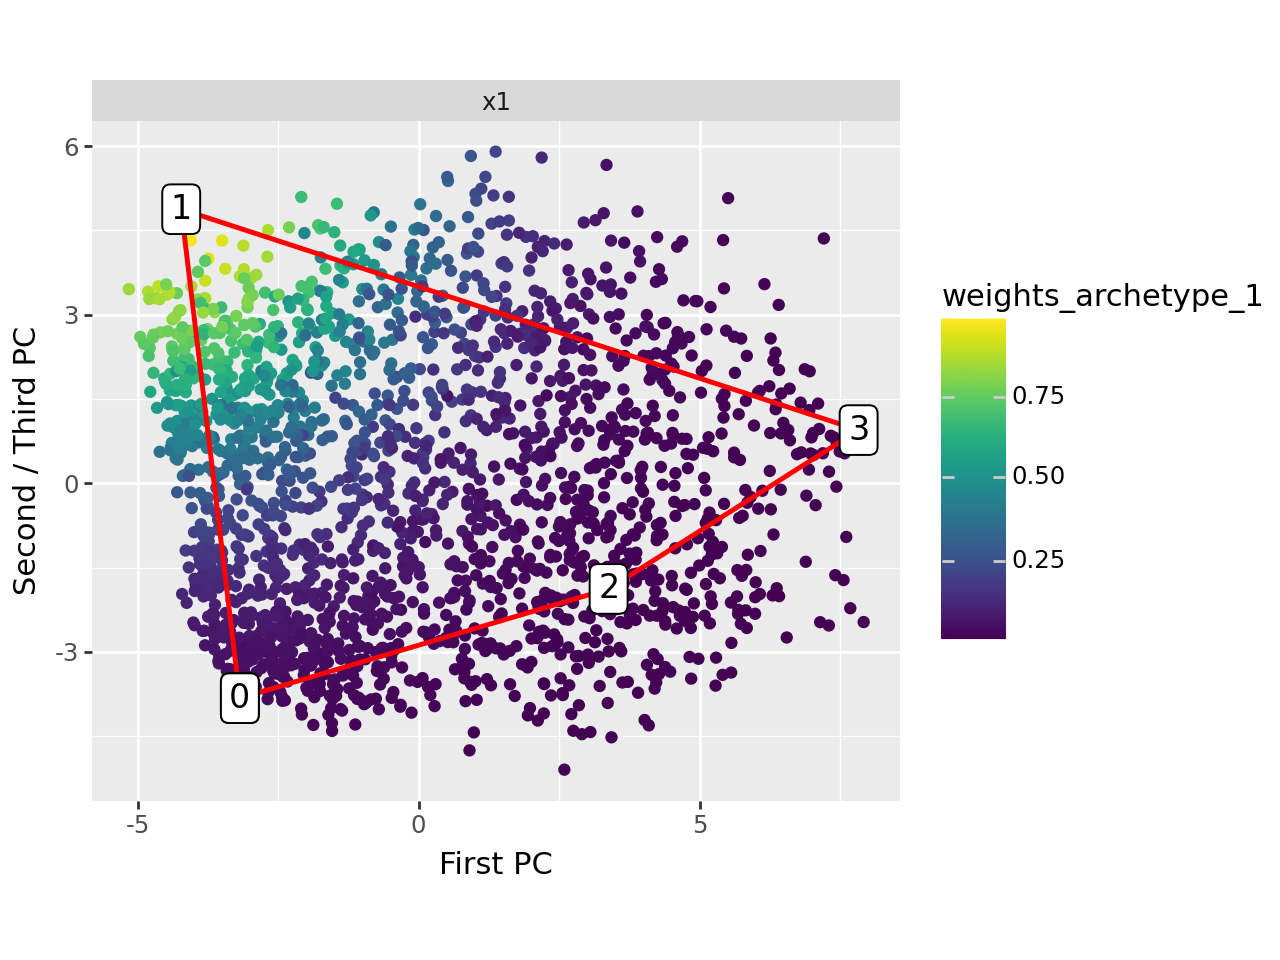

In [12]:
arch_idx = 1

pt.compute_archetype_weights(adata=adata, mode="automatic")
archetype_expression = pt.compute_archetype_expression(adata=adata, layer="z_scaled")

adata.obs[f"weights_archetype_{arch_idx}"] = adata.obsm["cell_weights"][:, arch_idx]
pt.plot_archetypes_2D(adata=adata, color=f"weights_archetype_{arch_idx}")

In [13]:
archetype_expression.T.sort_values(0, ascending=False).head(20)

,0,1,2,3
Pigr,0.439180,-0.419493,-0.098596,-0.015628
Pck1,0.433297,-0.200393,-0.279671,-0.172636
Hal,0.431677,-0.411123,-0.021411,-0.057117
Cyp2f2,0.415820,-0.550195,0.159069,0.044930
Trf,0.375239,-0.237100,-0.142198,-0.108481
Uox,0.361940,-0.138296,-0.291116,-0.149551
Gls2,0.360447,-0.340390,-0.062152,-0.014842
Cps1,0.334511,-0.219776,0.063332,-0.320057
Sfxn1,0.311722,-0.254542,-0.106099,-0.025963
Serpina1e,0.307250,-0.468358,-0.373839,0.443509


In [14]:
archetype_expression.T.sort_values(3, ascending=False).head(20)

,0,1,2,3
Fabp1,-0.506232,-0.344875,-0.182560,1.310858
Apoc3,-0.381922,-0.514743,0.115212,1.248246
Ttr,-0.564924,-0.627120,0.682168,1.198820
Dbi,-0.456138,-0.363338,0.208505,1.084241
Apoa1,-0.438635,-0.640431,0.782959,1.012744
Apoa2,-0.712654,-0.500064,0.743474,1.007339
Apoc1,-0.579782,-0.213005,-0.035397,0.958107
Gstp1,-0.202591,-0.258798,0.007083,0.911895
Chchd10,-0.307121,-0.198003,-0.037553,0.888021
Ndufa4,-0.325447,-0.325049,0.294035,0.842135


In [15]:
archetype_expression.T.sort_values(1, ascending=False).head(15).index

Index(['Cyp2e1', 'Oat', 'Cyp2c29', 'Rgn', 'Cyp2c50', 'Csad', 'Cyp3a11',
       'Cyp4a10', 'Rpl41', 'Rpl37', 'Rpl37a', 'Acaa1b', 'Slco1b2', 'Cyp1a2',
       'Car3'],
      dtype='object')

In [16]:
archetype_expression.T.sort_values(2, ascending=False).head(15).index

Index(['mt-Co3', 'Ambp', 'Vtn', 'Apoa1', 'Apoa2', 'Kng1', 'Apoe', 'Apoh',
       'mt-Atp6', 'mt-Co1', 'Ttr', 'Fgb', 'mt-Co2', 'mt-Nd1', 'Hpx'],
      dtype='object')

In [17]:
archetype_expression.T.sort_values(3, ascending=False).head(15)

,0,1,2,3
Fabp1,-0.506232,-0.344875,-0.182560,1.310858
Apoc3,-0.381922,-0.514743,0.115212,1.248246
Ttr,-0.564924,-0.627120,0.682168,1.198820
Dbi,-0.456138,-0.363338,0.208505,1.084241
Apoa1,-0.438635,-0.640431,0.782959,1.012744
Apoa2,-0.712654,-0.500064,0.743474,1.007339
Apoc1,-0.579782,-0.213005,-0.035397,0.958107
Gstp1,-0.202591,-0.258798,0.007083,0.911895
Chchd10,-0.307121,-0.198003,-0.037553,0.888021
Ndufa4,-0.325447,-0.325049,0.294035,0.842135


In [18]:
dc.op.show_resources()

,name,license
0,Adhesome,commercial
1,Almen2009,commercial
2,Baccin2019,academic
3,CORUM_Funcat,academic
4,CORUM_GO,academic
...,...,...
76,iTALK,academic
77,kinase.com,non_profit
78,scConnect,commercial
79,scConnect_complex,commercial


In [19]:
database = "reactome_pathways"
min_genes_per_pathway = 5
max_genes_per_pathway = 80

# dc.op.resource("SIGNOR", organism="mouse")
msigdb_raw = dc.op.resource("MSigDB")
msigdb = msigdb_raw[msigdb_raw["collection"]==database]
selection_vec = ~ np.array(["RESPONSE_TO" in s for s in msigdb["geneset"]]) & \
    ~ np.array(["GENE_EXPRESSION" in s for s in msigdb["geneset"]]) & \
    ~ np.array(["SARS_COV" in s for s in msigdb["geneset"]]) & \
    ~ np.array(["STIMULATED_TRANSCRIPTION" in s for s in msigdb["geneset"]])
msigdb = msigdb.loc[selection_vec, :].copy()
msigdb = msigdb[~msigdb.duplicated(["geneset", "genesymbol"])].copy()
genesets_within_min = (msigdb.value_counts("geneset") >= min_genes_per_pathway).reset_index().query("count")["geneset"].to_list()
genesets_within_max = (msigdb.value_counts("geneset") <= max_genes_per_pathway).reset_index().query("count")["geneset"].to_list()
genesets_to_keep = list(set(genesets_within_min) & set(genesets_within_max))
msigdb = msigdb.loc[msigdb["geneset"].isin(genesets_to_keep), :].copy() # removing small gene sets
msigdb_mouse = dc.op.translate(msigdb, target_organism="mouse") # requires decoupler >= 2.0.0
msigdb_mouse = msigdb_mouse.drop_duplicates()
msigdb_mouse = msigdb_mouse.rename(columns={"geneset": "source", "genesymbol": "target"})

acts_ulm_est, acts_ulm_est_p = dc.mt.ulm(data=archetype_expression,
                                         net=msigdb_mouse,
                                         verbose=True)

acts_ulm_est.iloc[:4, :4]

2025-06-08 10:58:20 | [INFO] ulm - Running ulm
2025-06-08 10:58:20 | [INFO] Extracted omics mat with 4 rows (observations) and 8354 columns (features)
2025-06-08 10:58:20 | [WARNING] weight not found in net.columns, adding it as:
net['weight'] = 1
2025-06-08 10:58:20 | [INFO] Network adjacency matrix has 3071 unique features and 777 unique sources
2025-06-08 10:58:20 | [INFO] ulm - fitting 777 univariate models of 8354 observations (targets) with 8352 degrees of freedom
2025-06-08 10:58:20 | [INFO] ulm - adjusting p-values by FDR
2025-06-08 10:58:20 | [INFO] ulm - done


,REACTOME_2_LTR_CIRCLE_FORMATION,REACTOME_ABACAVIR_ADME,REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS,REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS
0,-0.524164,0.378347,-1.795653,-0.126100
1,0.362084,0.373948,-1.290251,-0.051556
2,0.662086,-0.631647,2.725753,0.154484
3,0.035521,-1.131540,1.442886,0.192030


In [20]:
top_processes = pt.extract_enriched_processes(est=acts_ulm_est,
                                              pval=acts_ulm_est_p,
                                              order="desc",
                                              n=15,
                                              p_threshold=0.05)

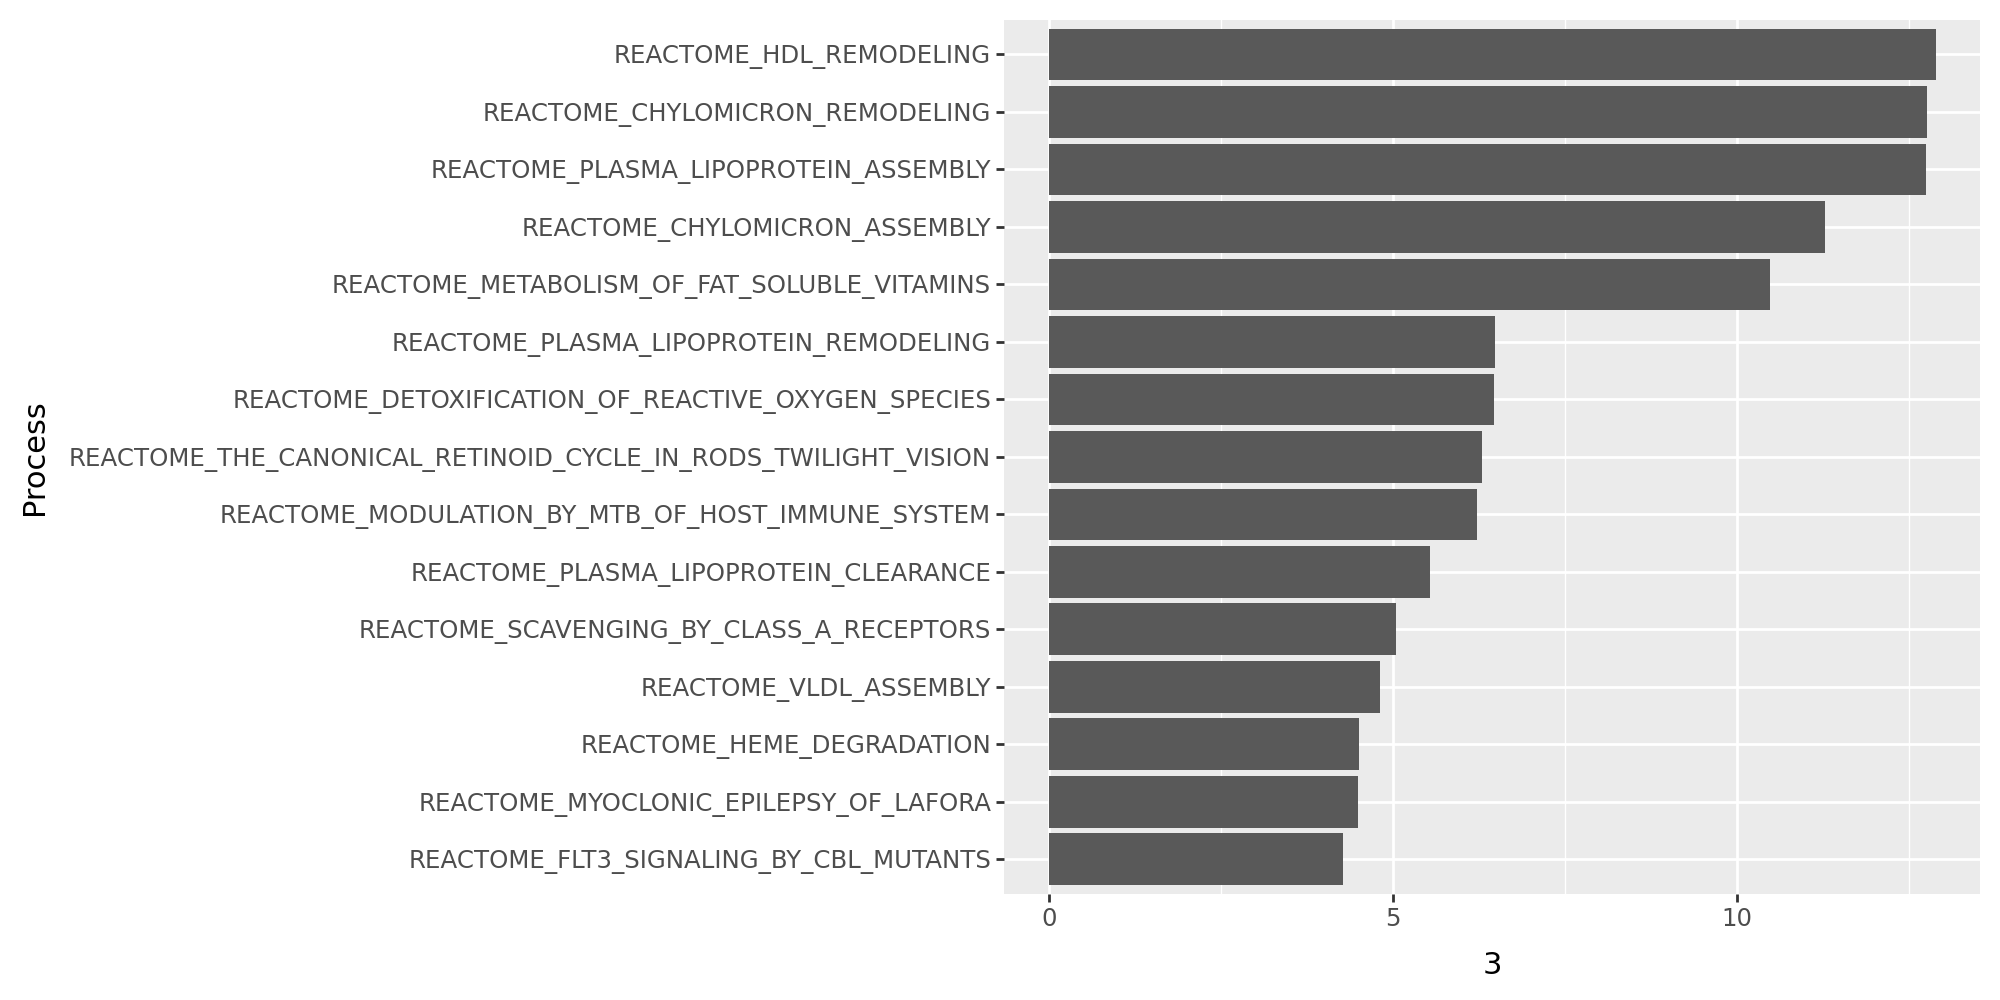

In [21]:
arch_idx = 3

top_processes[arch_idx]["Process"] = pd.Categorical(
    top_processes[arch_idx]["Process"],
    categories=top_processes[arch_idx].sort_values(f"{arch_idx}", ascending=True)["Process"].to_list()
)

(pn.ggplot(top_processes[arch_idx])
 + pn.geom_col(pn.aes(x="Process", y=f"{arch_idx}"))
 + pn.coord_flip()
 + pn.theme(figure_size=(10, 5)))


REACTOME_CHYLOMICRON_ASSEMBLY


array(['Apoc3', 'Apoa1', 'Apoa2', 'Apoe'], dtype='<U14')

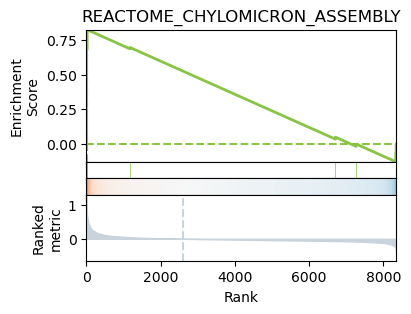

In [22]:
df = archetype_expression.T.copy()
df.columns = ["arch_" + str(c) for c in df.columns]
process = top_processes[arch_idx]["Process"][3]
print(process)
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = f"arch_{arch_idx}",
    name = process
)
le

In [23]:
archetype_expression.T.sort_values(arch_idx, ascending=False).head(20)

,0,1,2,3
Fabp1,-0.506232,-0.344875,-0.182560,1.310858
Apoc3,-0.381922,-0.514743,0.115212,1.248246
Ttr,-0.564924,-0.627120,0.682168,1.198820
Dbi,-0.456138,-0.363338,0.208505,1.084241
Apoa1,-0.438635,-0.640431,0.782959,1.012744
Apoa2,-0.712654,-0.500064,0.743474,1.007339
Apoc1,-0.579782,-0.213005,-0.035397,0.958107
Gstp1,-0.202591,-0.258798,0.007083,0.911895
Chchd10,-0.307121,-0.198003,-0.037553,0.888021
Ndufa4,-0.325447,-0.325049,0.294035,0.842135


In [24]:
df = archetype_expression.T.copy()
df.columns = ["arch_" + str(c) for c in df.columns]
df

,arch_0,arch_1,arch_2,arch_3
Mrpl15,-0.067518,-0.004444,0.006873,0.170004
Lypla1,0.015576,0.057215,-0.081212,-0.093073
Tcea1,-0.015170,0.075676,-0.138505,-0.063044
Atp6v1h,-0.017560,0.030317,-0.060431,-0.038883
Rb1cc1,0.041349,-0.014395,-0.007154,-0.015055
...,...,...,...,...
mt-Nd6,0.033729,0.008137,-0.003093,-0.110412
mt-Cytb,0.067566,-0.355086,0.577418,-0.050638
Vamp7,0.007894,0.017421,-0.041126,-0.026756
AC149090.1,0.037099,-0.103578,-0.007893,0.002212


array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2c38',
       'Ephx2'], dtype='<U14')

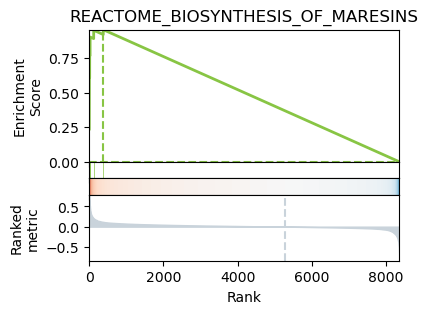

In [25]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_BIOSYNTHESIS_OF_MARESINS"
)
le

array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2c38',
       'Ephx2'], dtype='<U14')

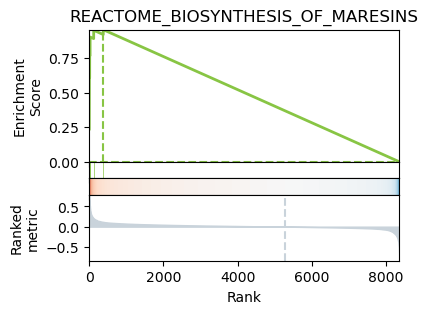

In [26]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_BIOSYNTHESIS_OF_MARESINS"
)
le

array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2c38'],
      dtype='<U14')

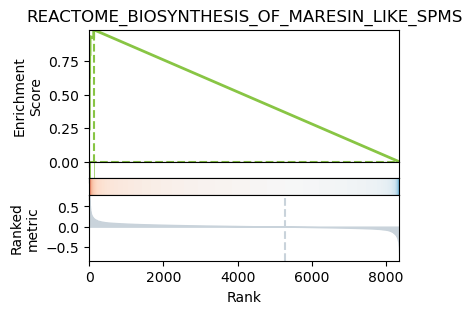

In [27]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS"
)
le

array(['Cyp2e1', 'Cyp2c29', 'Cyp2c50', 'Cyp1a2', 'Cyp2c37', 'Cyp2a5',
       'Cyp2c38', 'Ahr'], dtype='<U14')

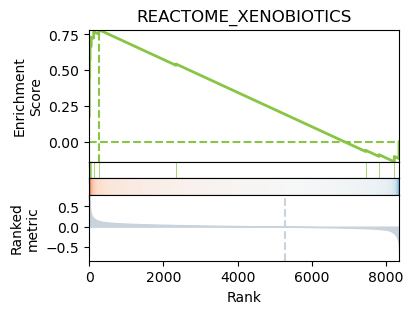

In [28]:
_, le = dc.pl.leading_edge(
    df = df,
    net = msigdb_mouse,
    stat = "arch_1",
    name = "REACTOME_XENOBIOTICS"
)
le

In [29]:
"STIMULATED_TRANSCRIPTION"

'STIMULATED_TRANSCRIPTION'

In [30]:
archetype_expression.T.sort_values(3, ascending=False).head(20)

,0,1,2,3
Fabp1,-0.506232,-0.344875,-0.182560,1.310858
Apoc3,-0.381922,-0.514743,0.115212,1.248246
Ttr,-0.564924,-0.627120,0.682168,1.198820
Dbi,-0.456138,-0.363338,0.208505,1.084241
Apoa1,-0.438635,-0.640431,0.782959,1.012744
Apoa2,-0.712654,-0.500064,0.743474,1.007339
Apoc1,-0.579782,-0.213005,-0.035397,0.958107
Gstp1,-0.202591,-0.258798,0.007083,0.911895
Chchd10,-0.307121,-0.198003,-0.037553,0.888021
Ndufa4,-0.325447,-0.325049,0.294035,0.842135


In [31]:
msigdb.loc[msigdb["geneset"].isin(["REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS"])]

,genesymbol,collection,geneset
,,,
1130631,COMPLEX:CYP2C8,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1130784,COMPLEX:CYP2C9,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1130958,COMPLEX:CYP2D6,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1131125,COMPLEX:CYP2E1,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
1131745,COMPLEX:CYP3A4,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2486329,CYP1A2,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2489995,CYP2C8,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2490148,CYP2C9,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
2490322,CYP2D6,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS


In [32]:
msigdb_mouse.loc[msigdb_mouse["source"].isin(["REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS"])]

,target,collection,source
3968,Cyp1a2,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4073,Cyp2c66,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4074,Cyp2c65,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4075,Cyp2c29,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4076,Cyp2c39,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4077,Cyp2c38,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4115,Cyp2c37,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4117,Cyp2c50,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS
4137,Cyp2e1,reactome_pathways,REACTOME_BIOSYNTHESIS_OF_MARESIN_LIKE_SPMS


In [33]:
archetype_expression.iloc

In [34]:
msigdb = msigdb_raw[msigdb_raw["collection"]=="go_biological_process"]
selection_vec = ~ np.array(["RESPONSE_TO" in s for s in msigdb["geneset"]])
msigdb = msigdb.loc[selection_vec, :].copy()
msigdb

,genesymbol,collection,geneset
,,,
73,A1CF,go_biological_process,GOBP_MRNA_METABOLIC_PROCESS
78,A1CF,go_biological_process,GOBP_EMBRYO_IMPLANTATION
84,A1CF,go_biological_process,GOBP_MACROMOLECULE_CATABOLIC_PROCESS
87,A1CF,go_biological_process,GOBP_MRNA_MODIFICATION
88,A1CF,go_biological_process,GOBP_RNA_PROCESSING
...,...,...,...
5522215,ZZZ3,go_biological_process,GOBP_PROTEIN_ACYLATION
5522223,ZZZ3,go_biological_process,GOBP_HISTONE_H3_ACETYLATION
5522241,ZZZ3,go_biological_process,GOBP_REGULATION_OF_MULTICELLULAR_ORGANISMAL_DE...


In [35]:
selection_vec = ~ np.array(["RESPONSE_TO" in s for s in msigdb["geneset"]])

